In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pandas as pd

In [2]:
'''
找出 tde 中所有fits文件
'''
path = r'tde'
files = os.listdir(path)
files_fits = []
for name in files:
    keyword = 'fits'
    if keyword in name:
        files_fits.append(os.path.join(path, name))
        
'''
读入 csv 以获取坐标信息
'''
for name in files:
    keyword = 'csv'
    if keyword in name:
        file_csv = os.path.join(path, name)

In [3]:
def event_time(df,r,center_x,center_y):   # 
    x=np.array(df['X'])
    y=np.array(df['Y'])
    value=0.
    for i in range(len(x)):
        if (x[i]-center_x)**2+(y[i]-center_y)**2<=r**2:
            value=value+1.
        else:pass
    return value

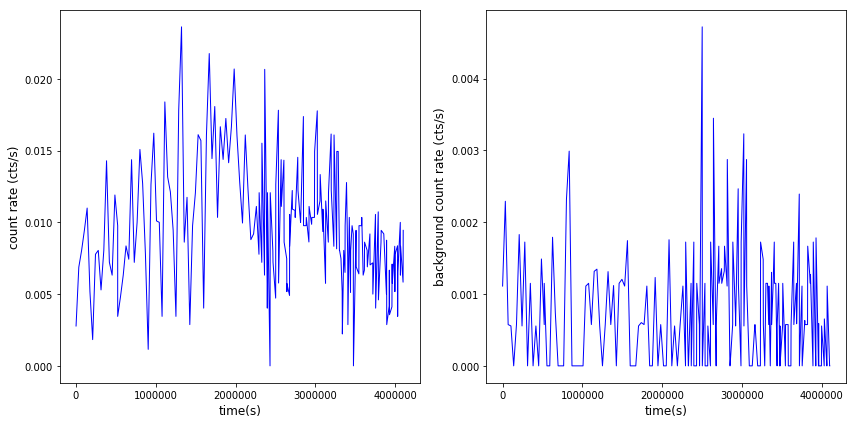

In [18]:
data_0 = Table.read(files_fits[0]).to_pandas()
time_0 = np.array(data_0['TIME'])
dt = 1   # 时间步长
rate_list = []
time_list = []
back_info = pd.read_csv('back_point.csv')
back_list = []


for m in range(len(files_fits)):
    data = Table.read(files_fits[m]).to_pandas()
    x = np.array(data['X'])
    y = np.array(data['Y'])
    PI=np.array(data['PI'])
        
    obs_info = pd.read_csv(file_csv)
    source_point = [obs_info[' X'][m], obs_info[' Y'][m]]   # 源中心点坐标
    x0, y0 = source_point[0], source_point[1]
    r0 = 20   # 源半径
    back_point = [back_info['x_back'][m], back_info['y_back'][m]]  #背景中心点坐标
    xb, yb = back_point[0], back_point[1]
    rb = 20   # 背景半径
    
    time = np.array(data['TIME'])   # 提取时间信息

    xgrade = np.arange(time.min(),time.max()+dt,dt)
    value = []
    vback = []
    for i in range(1,len(xgrade)):
        df = data[(data['TIME']>=xgrade[i-1]) & (data['TIME']<xgrade[i])]
        value.append(event_time(df,r0,x0,y0))
        vback.append(event_time(df,rb,xb,yb))
    value = np.array(value)
    vback = np.array(vback)
    total_value = np.sum(value)
    total_vback = np.sum(vback)
    total_time = time.max()-time.min()
    rate_list.append(total_value/total_time)
    back_list.append(total_vback/total_time)
    time_list.append((time.max()+time.min())/2-time_0.min())


fig = plt.figure(figsize=[12,6])

ax1 = fig.add_subplot(121)
ax1.set_xlabel('time(s)',fontsize=12)
ax1.set_ylabel('count rate (cts/s)',fontsize=12)
#ax1.scatter(time_list,rate_list,c='blue',marker='o',s=1.5) 
ax1.plot(time_list,rate_list,'b-',linewidth=1,markersize=4)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('time(s)',fontsize=12)
ax2.set_ylabel('background count rate (cts/s)',fontsize=12)
#ax2.scatter(time_list,rate_list,c='blue',marker='o',s=1.5) 
ax2.plot(time_list,back_list,'b-',linewidth=1,markersize=4)

fig.tight_layout()
plt.show()

In [26]:
column_name=['time','rate','back_rate']
csv_data = [time_list,rate_list,back_list]
csv_data = np.array(csv_data)
test = pd.DataFrame(columns=column_name, data=csv_data.T)
test.to_csv('lc.csv', index=0)

print('total s/n:', np.sum(rate_list)/np.sum(back_list))

total s/n: 13.172611571392906


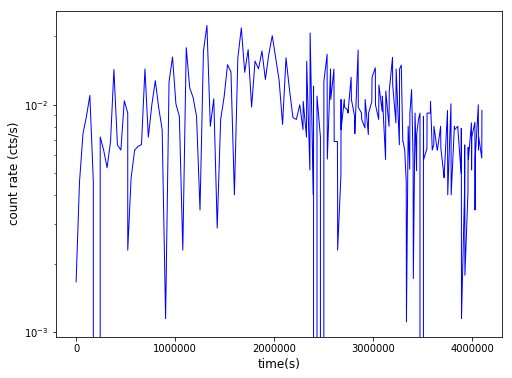

In [24]:
rate_list = np.array(rate_list)
back_list = np.array(back_list)
rate_clean = rate_list - back_list

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.set_yscale("log")
ax.set_xlabel('time(s)',fontsize=12)
ax.set_ylabel('count rate (cts/s)',fontsize=12)
#ax1.scatter(time_list,rate_clean,c='blue',marker='o',s=1.5) 
ax.plot(time_list,rate_clean,'b-',linewidth=1,markersize=4)
plt.show()

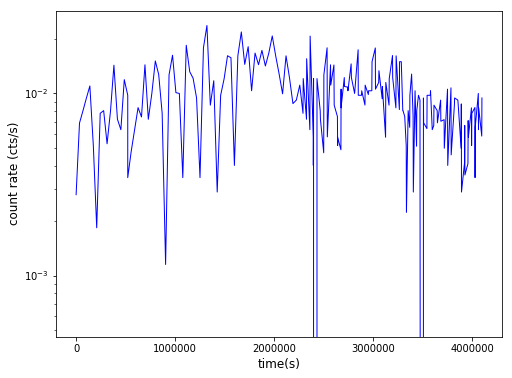

In [8]:
'''
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.set_yscale("log")
ax.set_xlabel('time(s)',fontsize=12)
ax.set_ylabel('count rate (cts/s)',fontsize=12)
#ax.scatter(time_list,rate_list,c='blue',marker='o',s=1.5) 
ax.plot(time_list,rate_list,'b-',linewidth=1,markersize=4)
plt.show()
'''